## Purpose of the Project
The goal of this project is to apply supervised machine learning to a real-world problem. The problem statement we choose to address is to determine 5 year career longetivity of NBA rookies. We use the player performance statistics to predict if the career of a NBA rookie will be more than 5 years or not. In the given dataset (described in detail below), there are a number of variables capturing the performance statistics of NBA players. We will be using this information to generate a binary decision on whether the player’s career will be more than 5 years. This is basically a classification problem and we will be exploring two of classification techniques; `Logistic Regression` and `Random Forest` to solve this problem .

## Overview of Supervised Machine Learning
Supervised learning is defined as machine learning where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.

Y = f(X)

The goal of supervised machine learning is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.

Supervised machine learning can be divided into two types 

1\)  Regression

Regression is used to understand the relationship between dependent and independent variables. It is commonly used to make projections, such as for sales revenue for a given business. In regression, we normally have one dependent variable and one or more independent variables. Here we try to “regress” the value of the dependent variable “Y” with the help of the independent variables.

2\)  Classification 

Classification basically makes use of an algorithm to accurately assign test data into specific categories. What it does is that it recognizes specific entities within the dataset and attempts to draw some conclusions on how those entities should be labeled or defined. Common classification algorithms are linear classifiers, support vector machines (SVM), decision trees, k-nearest neighbor, and random forest etc.


## Understanding the dataset

The reference link to dataset is provided here [https://data.world/exercises/logistic-regression-exercise-1] This data set contains information about 1,341 NBA rookie players. It contains the name of the player, 19 different performance statistics for each player and a target variable on whether the player will have a career length of 5 years or not. The performance statistics capture information like, games playes, points per game, field goals, 3 point attempts, free throws, rebounds and so on.

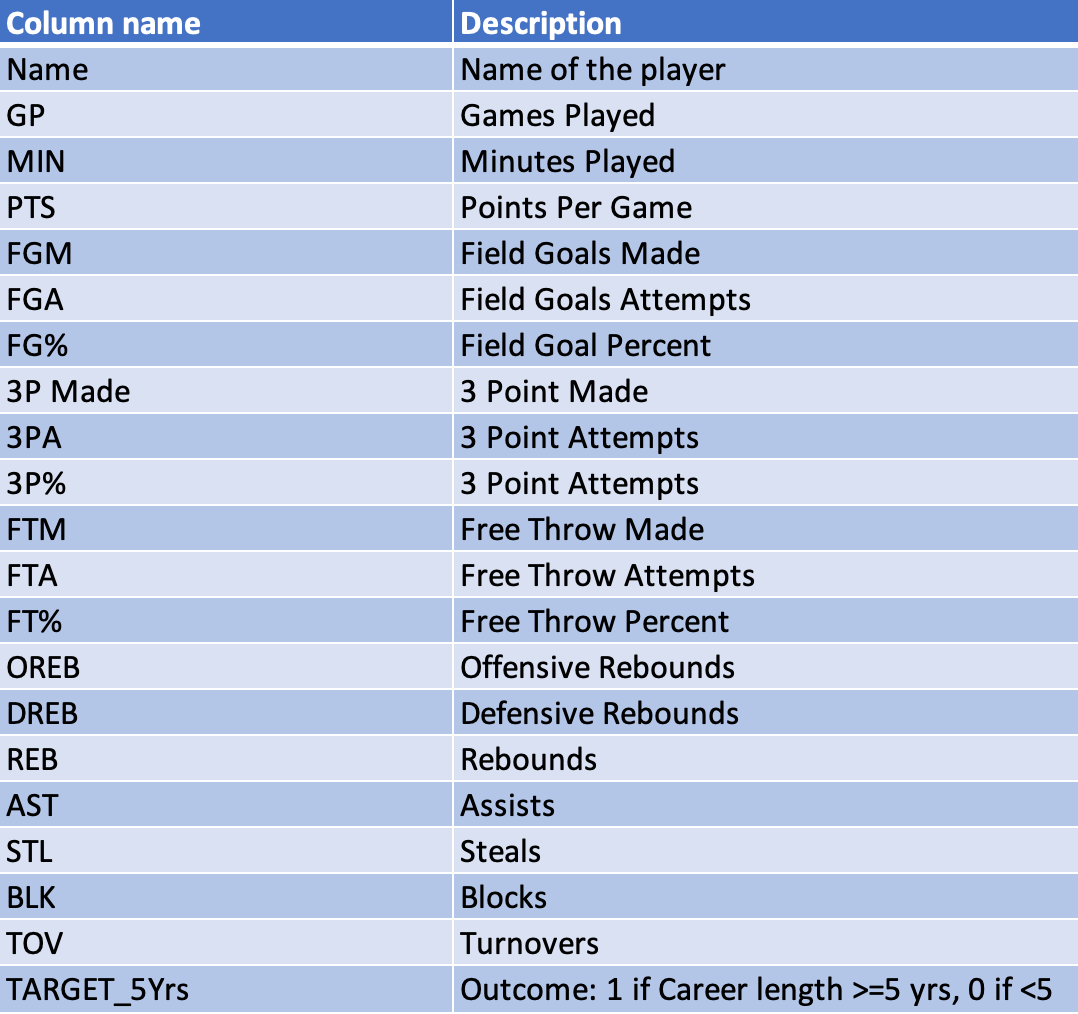

### Why do we need Machine Learning to solve this problem?

The need of the Machine Learning algorithm here is because the relationship between the predictor 
variables and target variable is not very evident. None of the independent variables
has a very good linear correlation with the target variable. So, we cannot use tools 
like SQL or excel to filter the players using simple rules. A few independent variables 
have a Pearson’s correlation > 0.3 with the target variable which means that a 
machine learning model is best suited for solving this problem.

## Importing dependencies and loading data

#### Install dependencies

Our First step is to import and install all the required libraries for our project.

In [1]:
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Import dependencies

In [2]:
# Loading all the required libraries 
from collections import Counter
# Data Imports
import pandas as pd
import numpy as np

# importing preprocessing for slearn library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
# Plot imports
import matplotlib.pyplot as plt 
# plt.rc("font", size=18)
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from matplotlib.image import FigureImage
sns.set(style="white")

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# importing input and output
import io

# Create scaler object
scaler = MinMaxScaler()

#### Loading the dataset


In [6]:
# Loading the dataset 
nba_df = pd.read_csv('/nba_logreg.csv')



In [7]:
# After loading the dataset we want to view few rows of the dataset
nba_df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


## Data Profiling

#### Compare means between groups

Data profiling is the process of examining, analyzing, and creating useful summaries of the dataset. Data profiling produces critical insights from the data which can be really helpful at the later stage while training mahine learning models. 

Let's first compare the mean values of all the numeric features by grouping on `TARGET_5Yrs`. We notice that multiple variables like games played (`GP`), minutes played (`MIN`), points per game (`PTS`), field goals made (`FGM`), 3 point attempts (`3PA`), free throw made (`FTM`), free throw attempts (`FTA`), rebounds (`REB`) show significant difference in the mean values for the two groups and that players who have a career length of more than 5 years (`TARGET_5Yrs == 1`) have higher values for these statistics as compared to players whose career is less than 5 years. See the below cell for details.

In [8]:
nba_df.groupby('TARGET_5Yrs').mean() # To group by the TARGET_5Yrs variable.

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
TARGET_5Yrs,,,,,,,,,,,,,,,,,,,
0.0,51.577603,14.252259,5.042829,1.946169,4.542043,42.388802,0.229666,0.754617,19.378131,0.923379,1.321611,68.858546,0.718271,1.531238,2.247544,1.221022,0.498232,0.253438,0.942240
1.0,65.826715,19.690253,7.878700,3.047413,6.708063,45.260048,0.258604,0.794224,19.265496,1.526955,2.128400,71.183394,1.187726,2.328640,3.516486,1.752347,0.692178,0.439110,1.347533


#### Box-plots to compare distribution

Mean values can be effected by outliers in the data. So we compare the data distribution for all of these variables for the 2 classes using box-plots. The box-plots also confirm the hypothesis that the players who have a career length greater than 5 years, have higher values for majority of these statistics. See the below plots for details.

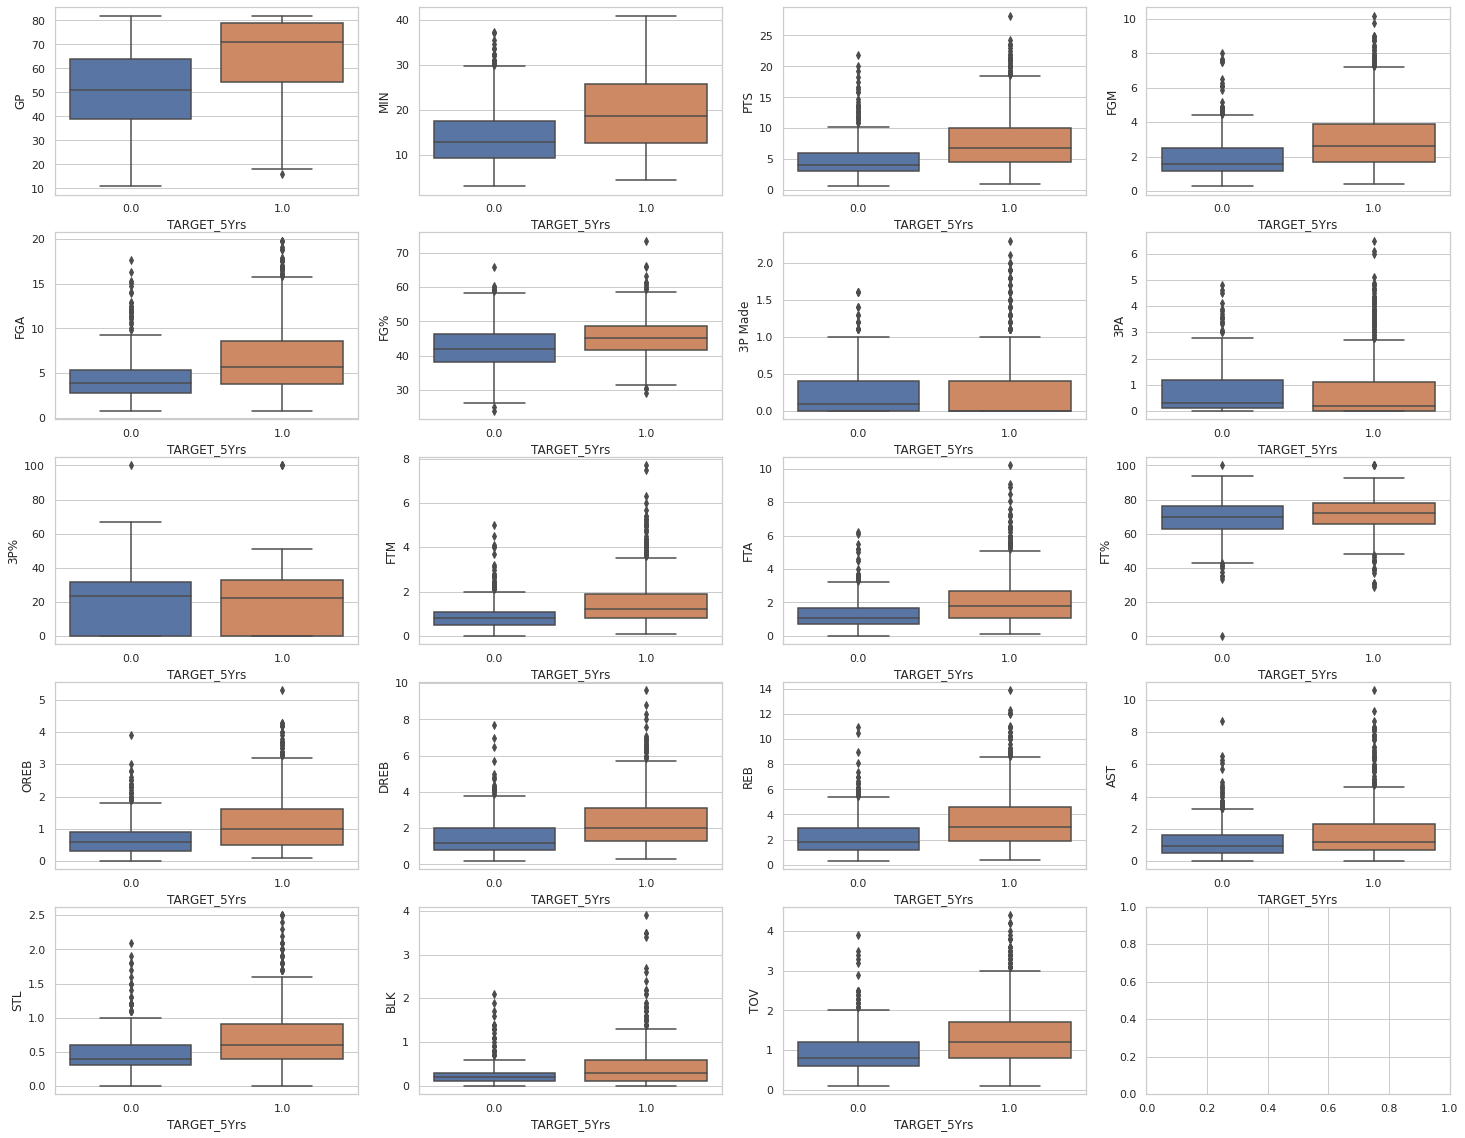

In [10]:
fig, axs = plt.subplots(5,4)
plt.rcParams['figure.figsize'] = [25, 20]
sns.set_theme(style="whitegrid")


sns.boxplot(x="TARGET_5Yrs", y='GP', data=nba_df, ax=axs[0][0])         # using boxplot to plot the "TARGET_5Yrs" on x axis and "Games Played" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='MIN', data=nba_df, ax=axs[0][1])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "Minutes Played" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='PTS', data=nba_df, ax=axs[0][2])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "Points Per Game" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='FGM', data=nba_df, ax=axs[0][3])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "Field Goals Made" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='FGA', data=nba_df, ax=axs[1][0])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "Field Goals Attempts" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='FG%', data=nba_df, ax=axs[1][1])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "Field Goals Percent" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='3P Made', data=nba_df, ax=axs[1][2])    # using boxplot to plot the "TARGET_5Yrs" on x axis and "3 Points made" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='3PA', data=nba_df, ax=axs[1][3])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "3 Points Attempts" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='3P%', data=nba_df, ax=axs[2][0])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "3 Points Attempts" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='FTM', data=nba_df, ax=axs[2][1])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "Free Throw Made" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='FTA', data=nba_df, ax=axs[2][2])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "Free Throw Attempts" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='FT%', data=nba_df, ax=axs[2][3])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "Free Throw Percent" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='OREB', data=nba_df, ax=axs[3][0])       # using boxplot to plot the "TARGET_5Yrs" on x axis and "Offensive Rebounds" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='DREB', data=nba_df, ax=axs[3][1])       # using boxplot to plot the "TARGET_5Yrs" on x axis and "Defensive Rebounds" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='REB', data=nba_df, ax=axs[3][2])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "Rebounds" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='AST', data=nba_df, ax=axs[3][3])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "Assists" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='STL', data=nba_df, ax=axs[4][0])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "Steals" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='BLK', data=nba_df, ax=axs[4][1])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "Blocks" on y axis.
sns.boxplot(x="TARGET_5Yrs", y='TOV', data=nba_df, ax=axs[4][2])        # using boxplot to plot the "TARGET_5Yrs" on x axis and "Turnovers" on y axis.



#### Handling missing values
 While reviewing the data set, we identified that the column "3P%" is having some nan or infinity values so we replace those values by the mean of the column. 

In [11]:
# Finding the mean of the column having NaN
mean_3p=nba_df["3P%"].mean()
  
# Replace NaNs in column 3P% with the mean value
nba_df["3P%"].fillna(value=mean_3p, inplace=True)

## Choosing features for model training

#### Pearson Correlation of independent features

Our next is to graph the heatmap using perason correlation. Through the heatmap we will come to know about the correlation between all the independent features and from that we will come to know which features we have to consider in our dataset for prediction. 

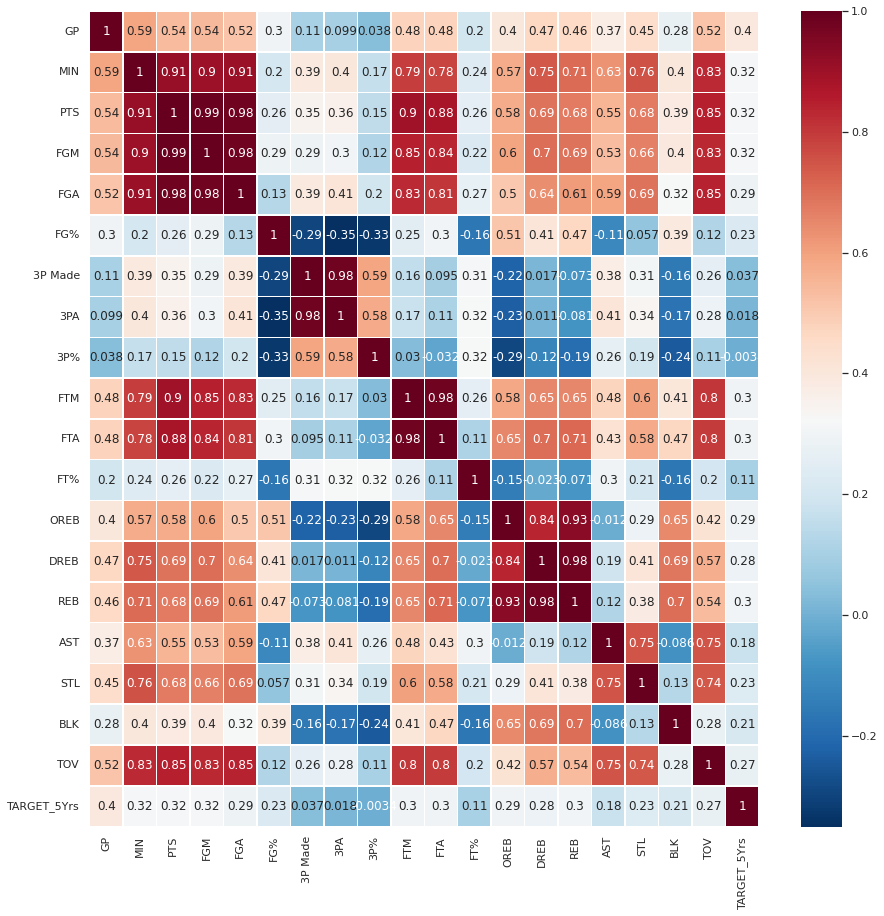

In [12]:
pearsoncorr = nba_df.corr(method='pearson')
pearsoncorr
plt.figure(figsize=(15,15))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,            
            cmap='RdBu_r',
            annot=True,
            linewidth=.5)
plt.show()   # To show the plot

####  Removing highly correlated features
We will use the above heatmap to identify good explanatory variables and have the following observations:

1.   `GP` (Games played) has 0.4 co-relation with `Target_5Yrs` variable which is very high and good corelation and intuitively it explains that if a player has a greater number of games played than that player can play more than 5 years and vice versa. Thus it makes `GP`(Games played ) a very good factor for predicting the result.

2. If two or more variables are very highly correlated, we will keep only one of them for training the model. For the purpose of this filtering, we consider a correlation value `>=0.9` to identify features which will be removed.

    a) From the heatmap we can see that variables `MIN`, `PTS`, `FGM`, `FGA` has very similar correlation with variable Target_5Yrs. Moreover all of these variables have very high correlation among all of them. So, there is no point of taking all these variables for consideration. We can only take one variable from.We will consider only `PTS` from the above 4 features. (Correlation >= 0.9)
    
    b) Now we can remove the feature `3PA` because it is highly coorelated to `3P Made`. (Correlation >= 0.9)
    
    c) We will remove `FTA` feature as it is highly coorelated to `FTM` (Correlation >= 0.9).

    d) We will remove features `OREB` and `DREB` as it is highly correlated to `REB` (Correlation >= 0.9).


Next we will remove these unwanted features from the training data.

In [13]:
# Remove features highly correlated to PTS (Correlation >= 0.9)
nba_df = nba_df.drop(["MIN", "FGM", "FGA", "FTM"], axis=1)

# Remove features highly correlated to 3P Made (Correlation >= 0.9)
nba_df = nba_df.drop(["3PA"], axis=1)

# Remove features highly correlated to FTM (Correlation >= 0.9)
nba_df = nba_df.drop(["FTA"], axis=1)

# Remove features highly correlated to REB (Correlation >= 0.9)
nba_df = nba_df.drop(["OREB", "DREB"], axis=1)


## Model training

#### Split data into train and test sets

* We create `x_train` by dropping the columns `Name` and `TARGET_5Yrs` from train data because `Name` is not an important feature and `TARGET_5Yrs` is what we want to predict.
* We also create `y_train` using `TARGET_5Yrs`, which are the labels for the training samples. 

* Similarly, we also create `x_test` and `y_test`.

In [14]:
# Create training and test sets
training_df, test_df = train_test_split(nba_df, test_size=0.3, random_state=42)

# Training data and labels
x_train = training_df.drop(["Name", "TARGET_5Yrs"], axis=1)
y_train = training_df["TARGET_5Yrs"]

# Test data and labels
x_test = test_df.drop(["Name", "TARGET_5Yrs"], axis=1)
y_test = test_df["TARGET_5Yrs"]

#### Train the min max scaler on training data and scale the training data

Our next step is to scale the train data so that all the features are at the same scale between `[0, 1]`. We will use `MinMaxScaler` to scale the data. Scaling will also help the model converge faster and as a side product, it will help us find feature importance (shown later) as all the features will be on the same scale.

**Note:** It is very important to note that the min-max scaler should be trained only on the training data and test data should first be separated before fitting the scaler to the data. We use the `fit_transform` method to train the scaler and fit it on the training data in a single step

In [15]:
# Train the scaler and Scale training data
x_train_scaled = scaler.fit_transform(x_train.to_numpy())
x_train_scaled = pd.DataFrame(x_train_scaled, columns=list(x_train))


#### Scaling the test data

Now the MinMax scaler is fit and our training data is scaled. We will now scale the test data also so that all the features are at the same scale. Notice that we use the `transform` method to just transform the test data and do not learn the scaling using this data.

In [16]:
# Scale test data
x_test_scaled = scaler.transform(x_test.to_numpy())
x_test_scaled = pd.DataFrame(x_test_scaled, columns=list(x_train))


#### Implement grid search to choose best model and hyperparameters

Here we will implement the grid search to choose the best model and best set of hyperparameters for the model. We will use 5-fold cross validation to choose best hyperparameters for `LogisticRegression` and `RandomForest` classifiers and identify which one of the 2 classifiers performs better for our data. We will use F-1 score as the scoring criteria for cross-validation to choose the best hyperparameters using grid search.

In [17]:
# Train model
def train_model(x_train, y_train, classifier, classifier_params):
    """Train model using grid search."""
    clf_search = GridSearchCV(estimator=classifier, param_grid=classifier_params, cv=5, scoring='f1',
                              n_jobs=-1, verbose=1)
    clf_search = clf_search.fit(x_train, y_train)

    clf_search_best_cv = cross_val_score(estimator=clf_search.best_estimator_,
                                         X=x_train,
                                         y=y_train,
                                         cv=5,
                                         scoring='f1',
                                         n_jobs=-1,
                                         verbose=10)
    print("Grid search cross-validation F-1 scores: %s", str(clf_search_best_cv))
    print("Best parameters:", str(clf_search.best_params_))

    return clf_search.best_estimator_


#### Training Logistic Regression Model

We first train the logistic regression model and we will use the `l2` penalty and different `C` values for regularization. From that we will come to know about the best parameters. when the parameters are selected then we will use that parameters for the prediction on the test data.


In [18]:
# Train logistic regression classifier
print("Training a logistic regression classifier..")
# Choose different norms for penalty and regularization strength
clf_lr_params = {'penalty': ['l2'], 'C': [0.5, 0.8, 0.9, 1.0]}
clf_lr = train_model(x_train=x_train_scaled, 
                     y_train=y_train,
                     classifier=LogisticRegression(max_iter=5000),
                     classifier_params=clf_lr_params)


Training a logistic regression classifier..
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Grid search cross-validation F-1 scores: %s [0.76612903 0.77941176 0.73170732 0.79508197 0.796875  ]
Best parameters: {'C': 0.8, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0546s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


From the above results of grid search using cross-validation, we observe that the best value of regularization parameter `C` is `0.8` using `L2` norm.

#### Prediction on hold out test set using Logistic regression

Now that, we have chosen the best estimator (using grid search), we will use it to make predictions on the test set. 

              precision    recall  f1-score   support

         0.0       0.67      0.51      0.58       156
         1.0       0.73      0.84      0.78       246

    accuracy                           0.71       402
   macro avg       0.70      0.67      0.68       402
weighted avg       0.71      0.71      0.70       402



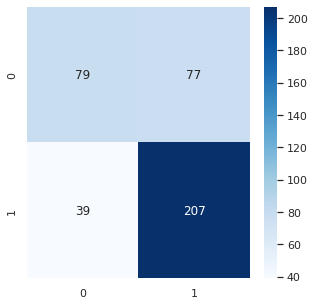

In [19]:
# Check performance of logistic regression on test data
y_test_pred = clf_lr.predict(x_test_scaled)
print(classification_report(y_test, y_test_pred))

plt.rcParams['figure.figsize'] = [5, 5]
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='g',cmap='Blues')
plt.show()

#### Observation from Logistic Regression Model
As it is a binary classification problem and our goal is to predict whether the career of a player is more than 5 years, let's focus on `Class 1` to understand the results of the model.

From the above results, we get a f1-score of `0.78` for the `class 1`. To interpret the results, let's go through the above classification report and the confusion matrix.

* Our model was able to correctly identify `207` players out of `246` players which had a career longetivity of 5 years. So, the recall is 0.84. There were `39` false negatives. 
* The model had `77` false positives; that is 77 players were wrongly predicted to be playing more than 5 years but their career was infact shorter than that.

#### Training Random Forest Classifier

As we have done prediction using logistic regression model. Now we want to predict on the same data using random forest classifier to know that which model performs well.We will train the model by passing the training data and from that we will get to know the best parameters for random forest classifier and we will use that parameters for the prediction on the test data.



In [20]:
# Train random forest classifier
print("Training a random forest classifier..")
clf_rf_params = {'max_features': ['log2', 'sqrt'], 'n_estimators': [200, 500, 700, 1000]}
clf_rf = train_model(x_train=x_train_scaled, 
                     y_train=y_train,
                     classifier=RandomForestClassifier(),
                     classifier_params=clf_rf_params)


Training a random forest classifier..
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    4.1s remaining:    2.7s


Grid search cross-validation F-1 scores: %s [0.74493927 0.76045627 0.71794872 0.76987448 0.75396825]
Best parameters: {'max_features': 'log2', 'n_estimators': 500}


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished


#### Prediction on hold out test set using Random Forest.

Now that, we have chosen the best parameters for Random forest now we will use these parameters to make predictions on the test set. The value of best hyperparameters is: `max_features: sqrt` and `n_estimators: 500` and we will use this for test data to make predictions.

              precision    recall  f1-score   support

         0.0       0.66      0.48      0.56       156
         1.0       0.72      0.84      0.78       246

    accuracy                           0.70       402
   macro avg       0.69      0.66      0.67       402
weighted avg       0.70      0.70      0.69       402



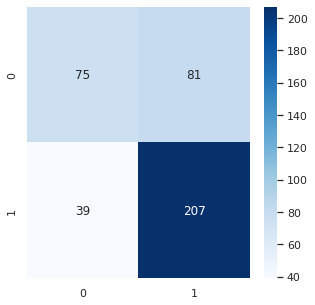

In [21]:
# Check performance of random forest on test data
y_test_pred = clf_rf.predict(x_test_scaled)
print(classification_report(y_test, y_test_pred))

plt.rcParams['figure.figsize'] = [5, 5]
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='g',cmap='Blues')
plt.show()

**Observation from Random Forest:**


As it is a binary classification problem and our goal is to predict whether the career of a player is more than 5 years, let's focus on Class 1 to understand the results of the model.

we get the precision value of 0.72 for players that have carrer longevitity more than 5 years and there are total 246 players who have career longetivity more than 5 years. 


From the above results, we get a f1-score of `0.77` for the class 1. To interpret the results, let's go through the above classification report and the confusion matrix.


*   Our model was able to correctly identify `206` players out of `246` players which had a career longetivity of 5 years. So, the recall is `0.84`. There were 40 false negatives.
*   The model had `82` false positives; that is 82 players were wrongly predicted to be playing more than 5 years but their career was infact shorter than that.








## Identify important features

#### Compute feature importance

Feature importance is basically used to see which are best features that can be used to predict the dependent variable. So we will write a function extract 10 most important features that for the two models and will plot the feature importance. 

**Note:** It is important to note that since all the features are at the same scale, the parameter estimates for logistic regression will be used to compute feature importance.

In [22]:
# Compute feature importance
def plot_feature_importance(clf, model_type, x_train, n_features):
    """Compute feature importance.

    clf: Trained model object
    model_type: Type of model (LR or RF)
    x_train: Training data
    n_features: Number of features to be extracted
    """
    if model_type == "LR":
        feature_weights = clf.coef_[0]
    elif model_type == "RF":
        feature_weights = clf.feature_importances_

    estimates = {}
    for i, v in enumerate(feature_weights):
        estimates[x_train.columns[i]] = round(v, 2)

    # Ignore the sign to compute the features with highest estimates
    importance = {}
    for k, v in estimates.items():
        importance[k] = abs(v)
    top_n_features = dict(Counter(importance).most_common(n_features))

    important_features = {}
    for k in top_n_features:
        important_features[k] = estimates[k]
    
    plt.bar(range(len(important_features)), list(important_features.values()), align='center')
    plt.xticks(range(len(important_features)), list(important_features.keys()))
    plt.rcParams['figure.figsize'] = [20, 5]
    plt.show()



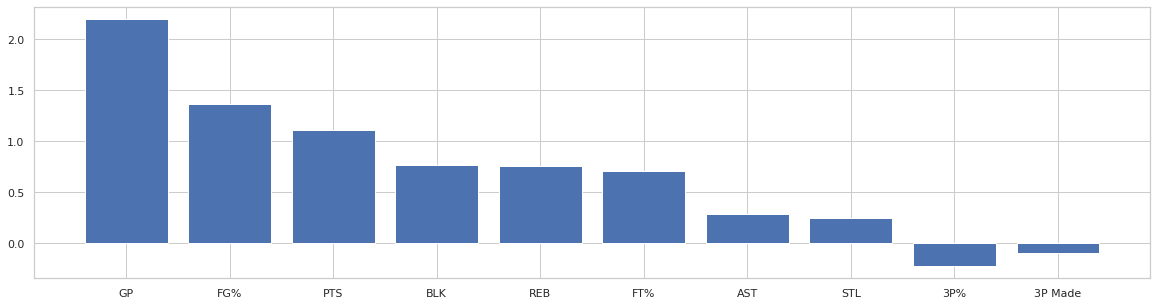

In [24]:
# Plot feature importance for 10 most important features for Logistic Regression model
plot_feature_importance(clf=clf_lr, model_type="LR", x_train=x_train, n_features=10)


From the above plot we come to know that the 10 most important features that are used for prediction in Logistic Regression are "GP","FG%", "PTS", "BLK", "REB", "FT%", "AST" , "STL" , "3P%", "3P Made". 

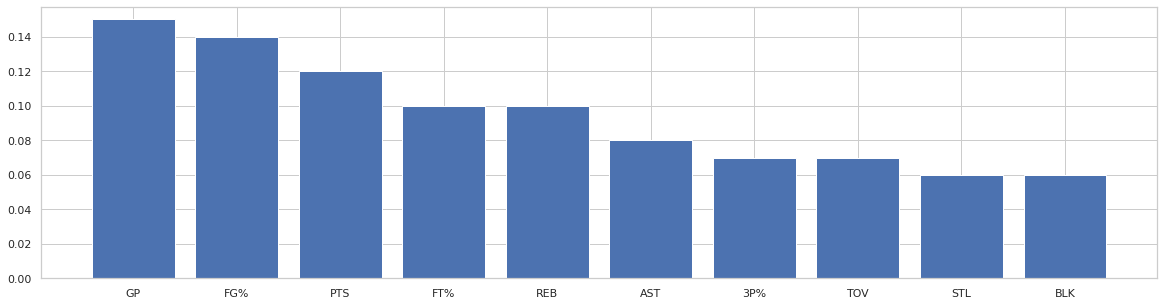

In [25]:
# Plot 10 most important features for Random Forest model
plot_feature_importance(clf=clf_rf, model_type="RF", x_train=x_train, n_features=10)


From the above plot we come to know that the 10 most important features that are used for prediction in Random Forest are "GP","FG%", "PTS", "FT%","REB", "AST", "3P%", "TOV", "STL","BLK". 

## Interesting findings and business insights

The following 9 features are common among the top 10 features for both Logistic Regression and Random Forest
* `GP` - Games Played
* `FG%` - Field Goal Percent
* `PTS` - Points per game
* `FT%` - Field throw percent 
* `REB` - Rebounds
* `AST` - Assists
* `3P%` - 3 Point Attempts
* `STL` - Steals
* `BLK` - Block

All of these features are positively correlated with the target variable which makes a lot of sense intuitively as a player who performs better in terms of all these stats has a higher chance of player the game for longer period of time. 

#### Key business insight
The key business insight we have from this project is that we can effectively use the above features to predict whether a player can have a 5 year career in NBA or not. This can help franchises look at the past record of the players and decide on whether they want to sign them if they're looking for a player which stays with the franchise for multiple years.



# **Conclusion**



* We have used Cross validation and grid search to find the best model.

*  From the cross validation we come to know that **Logistic regression performs marginally better than random forest** because the % f1 score of logistic regression is more as compared to random forest and after that we have also tested the data on both the models.

* This is also later seen on the hold out test set and logistic regression performs better than Random Forest. It has a similar recall but a marginally higher precision making it the preferred model among these 2 for solving this problem.

* The models are easily explainable based on the important features identified.

* Based on the above results, we can conclude that our model can be successfully used by franchises to sign players as it helps predict the career longetivity of players with a high degree of accuracy.


